In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import numpy.random as rnd


#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

# HW2

1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

In [2]:
# and = P(a and b) = P(a)P(b)
# or = P(a or B) = P(a) + P(b) + P(a)P(b)
#die1 = [1, 2, 3, 4, 5, 6]
#die2 = [1, 2, 3, 4, 5, 6]

#two = 0
#seven = 0

#for idx, val in enumerate(die1):
#    for jdx, val2 in enumerate(die2):
#        outcome = val + val2
#        if outcome == 7:
#            seven += 1
#        elif outcome == 2:
#            two += 1

#snake_eyes = two/11
#sevens = seven/11

two_prob = 1/6 * 1/6
seven_prob = 6/36


print(f'The ratio of the probability of rolling snake eyes is {two_prob}.')
print(f'The ratio of the probability of rolling sevens is {seven_prob}.')

The ratio of the probability of rolling snake eyes is 0.027777777777777776.
The ratio of the probability of rolling sevens is 0.16666666666666666.


2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

In [3]:
#die1 = [1, 2, 3, 4, 5, 6]
#die2 = [1/6, 2/6, 3/6, 4/6, 5/6, 6/6]
#die2 = [6, 5, 4, 3, 2, 1]

d1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
d2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

die1 = [1, 2, 3, 4, 5, 6]
die2 = [6, 5, 4, 3, 2, 1]

#conv = signal.convolve(die1, die2)
conv = signal.convolve(d1, d2)
conv #array conv has all the potential probabilities of sums 2 - 12

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [4]:
four_sum_prob = conv[2]
four_sum_prob

0.08333333333333333

The probability of the sum of two six sided dice through math and counting would be the amount of combinations that can add up to that sum (N) divided by the total number of combinations (36). For example, to get a sum of 4:

In [5]:
combos_of_four = 3 #(1,3), (2,2), (3,1)
sum_prob = combos_of_four/36
sum_prob

0.08333333333333333

3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [6]:
mean = np.mean(conv)
mean

0.09090909090909091

In [31]:
var = np.var(conv)
var

0.0019768390980512197

4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

In [8]:
d10_1 = np.full(6, 1/6)
d10_2 = np.full(6, 1/6)
d10_3 = np.full(6, 1/6)
d10_4 = np.full(6, 1/6)
d10_5 = np.full(6, 1/6)
d10_6 = np.full(6, 1/6)
d10_7 = np.full(6, 1/6)
d10_8 = np.full(6, 1/6)
d10_9 = np.full(6, 1/6)
d10_10 = np.full(6, 1/6)

In [9]:
con10_1 = signal.convolve(d10_1, d10_2)
#con10_2 = signal.convolve(d10_3, d10_4)
#con10_3 = signal.convolve(d10_5, d10_6)
#con10_4 = signal.convolve(d10_7, d10_8)
#con10_5 = signal.convolve(d10_9, d10_10)
con10_2 = signal.convolve(con10_1, d10_3)
con10_3 = signal.convolve(con10_2, d10_4)
con10_4 = signal.convolve(con10_3, d10_5)
con10_5 = signal.convolve(con10_4, d10_6)
con10_6 = signal.convolve(con10_5, d10_7)
con10_7 = signal.convolve(con10_6, d10_8)
con10_8 = signal.convolve(con10_7, d10_9)
con10_9 = signal.convolve(con10_8, d10_10)
con10_9

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

In [10]:
sums = np.arange(10, 61, 1)
sums

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

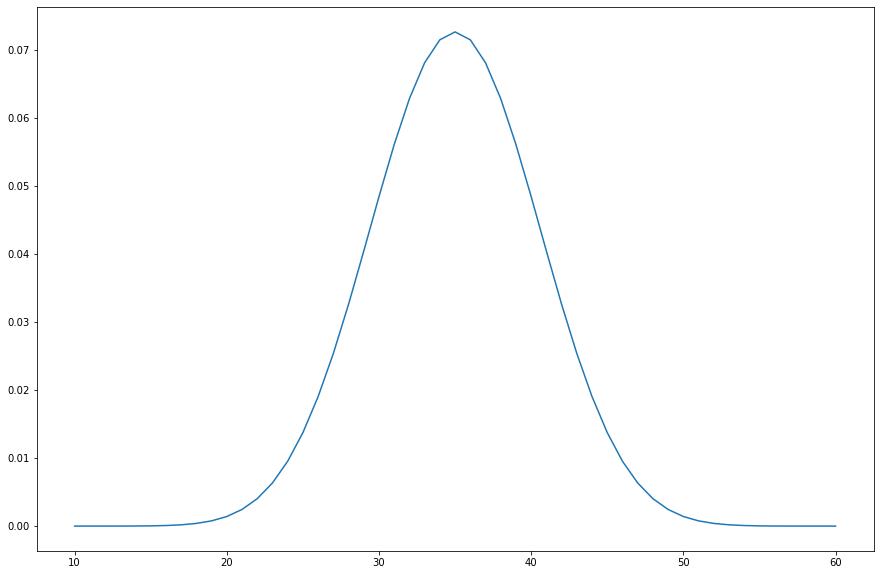

In [11]:
fig, ax = plt.subplots(1,1)

ax.plot(sums, con10_9)

This graph has the same bell shape as a gaussian, but it is not because it is still appearing to be discrete near the top of the graph. It is not continuous near where the bell starts to straighten out at the tip. It is approaching becoming a gaussian due to the Central Limit Theorem however, if more dice were to be rolled, the distribution would even out and become continuous.

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

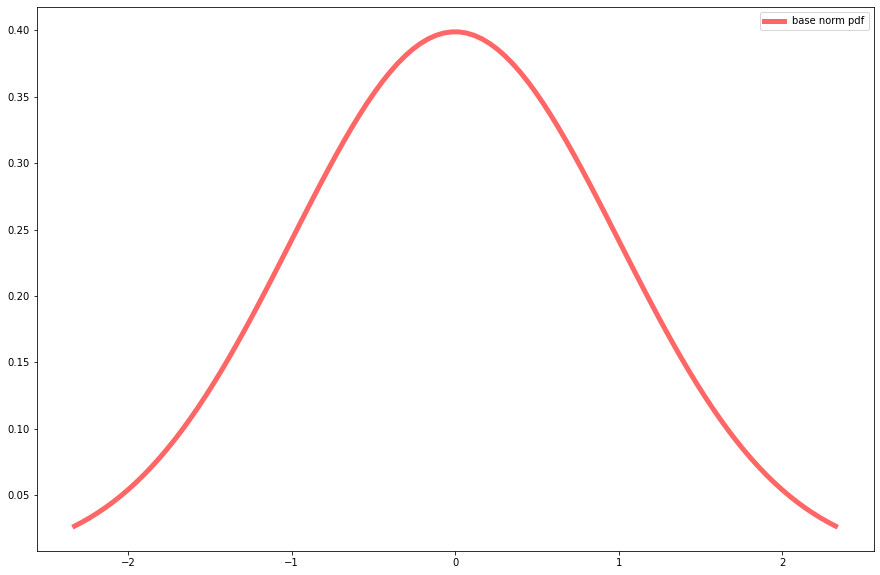

In [19]:
x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)

fig, ax = plt.subplots(1,1) 
ax.plot(x, stats.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='base norm pdf')
plt.legend()

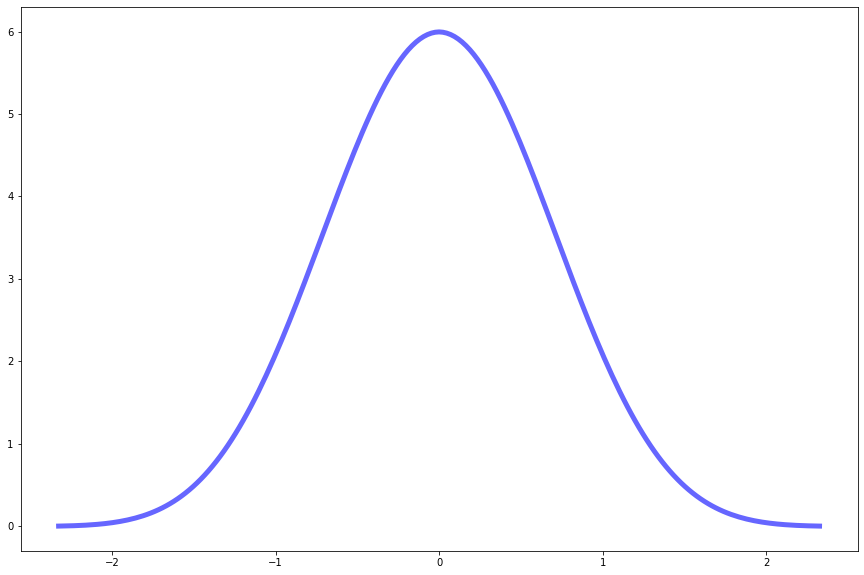

In [22]:
#x2 = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 199)
g = stats.norm.pdf(x)
conv_gauss = signal.convolve(g, g)
x2 = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), len(conv_gauss))

plt.plot(x2, conv_gauss, 'b-', lw=5, alpha=0.6, label='sum norm pdf')
plt.legend()

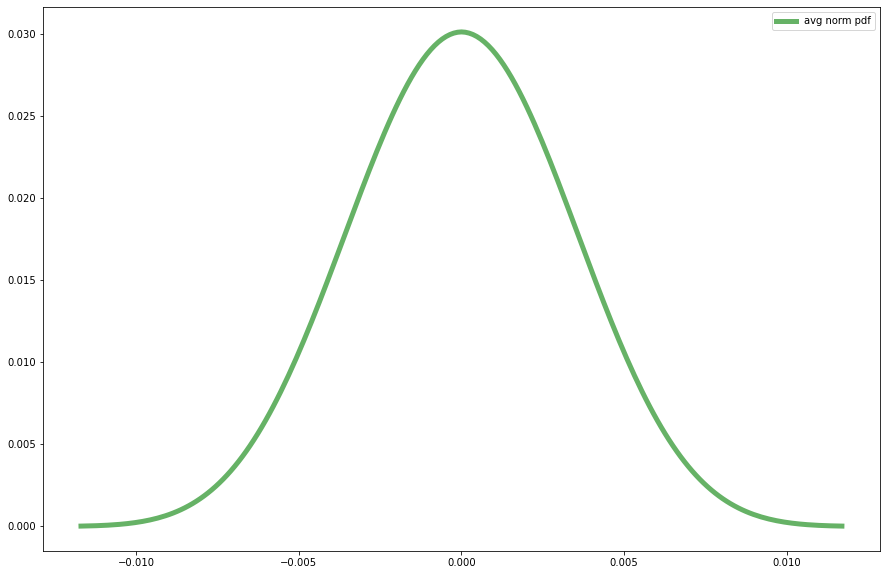

In [35]:
x_avg = x2 / len(conv_gauss)
plt.plot(x_avg, conv_gauss/len(conv_gauss), 'g-', lw=5, alpha=0.6, label='avg norm pdf')
plt.legend()

The sums and the average of the Gaussian remain to be Gaussian.

In [33]:
norm_std = np.std(g)
norm_std

0.12798133892103197

In [34]:
conv_std = np.std(conv_gauss)
conv_std

2.148221827021975

The standard deviation of the sum compared to the base gaussian is larger than its base standard deviation. What this means for integrating a signal over time is that as you sum up the area under the curve of the gaussian, the distance between each sum grows as the 